In [ ]:
# these csv files have the information for our costumers
# status column has six values in it 
# 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 
# 3: 90-119 days overdue 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month X: No loan for the month
# in this model we're trying to predict if we can know the status of the payment for an existing cotumer based on 
# his information in our dataset in order to predict if a perspective applicant is going to be approved 
# if they apply to our bank
# so we're basically (sending the data that we already have for our customers to a machine learning 
# to predict a model that will help us avoid having customer won't pay in the future)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import statistics
from statistics import mean
from mpl_toolkits import mplot3d

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [4]:
applicationRecordCSv = pd.read_csv('Resources/application_record.csv')

In [5]:
creditRecordCSv = pd.read_csv('Resources/credit_record.csv')

In [6]:
applicationRecordCSv

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [7]:
applicationRecordCSv.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [8]:
creditRecordCSv

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [9]:
creditRecordCSv.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [10]:
df = applicationRecordCSv.merge(creditRecordCSv,how='inner',on=['ID'])

In [11]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [12]:
for i in df.columns:
    value = df[i].value_counts()
    print(f'{i}')
    print('------------------')
    print(value)
    print('------------------')


ID
------------------
5090630    61
5148524    61
5066707    61
5061848    61
5118380    61
           ..
5024557     1
5062311     1
5024365     1
5024364     1
5041568     1
Name: ID, Length: 36457, dtype: int64
------------------
CODE_GENDER
------------------
F    518851
M    258864
Name: CODE_GENDER, dtype: int64
------------------
FLAG_OWN_CAR
------------------
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64
------------------
FLAG_OWN_REALTY
------------------
Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64
------------------
CNT_CHILDREN
------------------
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64
------------------
AMT_INCOME_TOTAL
------------------
135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
            ...  
51750.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name

In [13]:
for i in df.columns:
    nullSum = df[i].isna().sum()
    print(f'{i}')
    print('------------------')
    print(nullSum)
    print('------------------')


ID
------------------
0
------------------
CODE_GENDER
------------------
0
------------------
FLAG_OWN_CAR
------------------
0
------------------
FLAG_OWN_REALTY
------------------
0
------------------
CNT_CHILDREN
------------------
0
------------------
AMT_INCOME_TOTAL
------------------
0
------------------
NAME_INCOME_TYPE
------------------
0
------------------
NAME_EDUCATION_TYPE
------------------
0
------------------
NAME_FAMILY_STATUS
------------------
0
------------------
NAME_HOUSING_TYPE
------------------
0
------------------
DAYS_BIRTH
------------------
0
------------------
DAYS_EMPLOYED
------------------
0
------------------
FLAG_MOBIL
------------------
0
------------------
FLAG_WORK_PHONE
------------------
0
------------------
FLAG_PHONE
------------------
0
------------------
FLAG_EMAIL
------------------
0
------------------
OCCUPATION_TYPE
------------------
240048
------------------
CNT_FAM_MEMBERS
------------------
0
------------------
MONTHS_BALANCE
------

In [14]:
df['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [15]:
df['OCCUPATION_TYPE'].value_counts()

Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [16]:
df.drop('FLAG_MOBIL',axis=1,inplace=True)

In [17]:
df2 = df.copy()

In [18]:
#Modifying the Status column so it can hold only 0 or 1 for 
# the logistic regression model
# c and x are the only status without debt so we decided to convert c and x 
# to 1 and all other status with past due or over due 
def new_status(sample):
    if sample=='C' or sample=='X':
        return 1
    else:
        return 0
    
    

In [19]:
df2['STATUS'] = df2['STATUS'].apply(new_status)

In [20]:
df2['STATUS'].value_counts()

1    475486
0    302229
Name: STATUS, dtype: int64

In [21]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

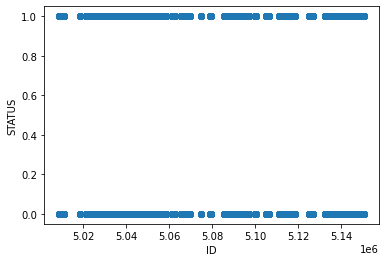

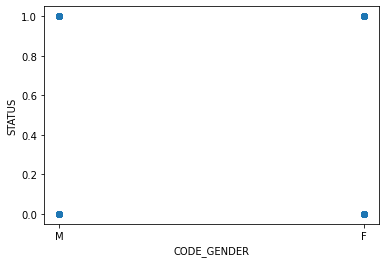

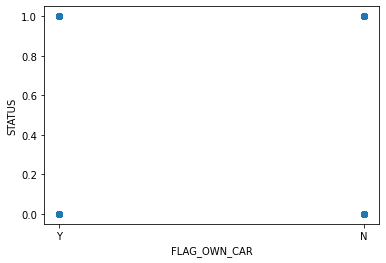

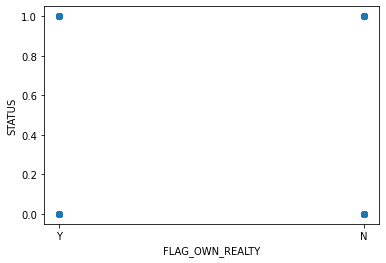

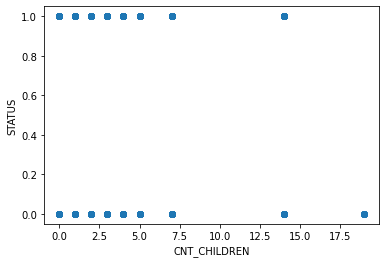

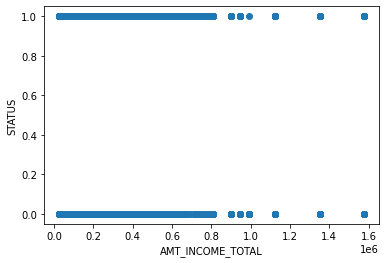

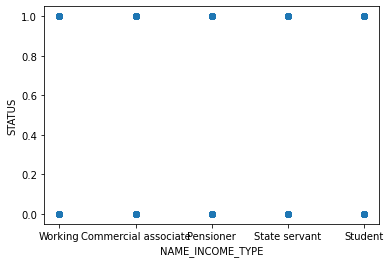

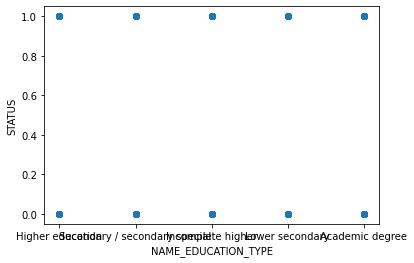

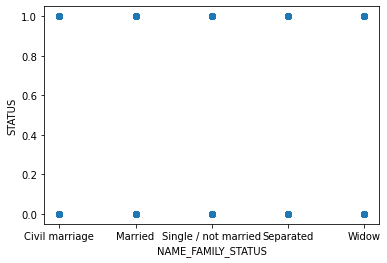

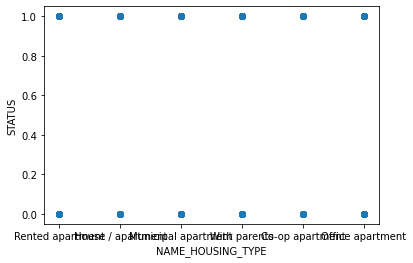

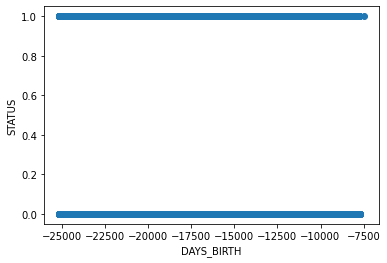

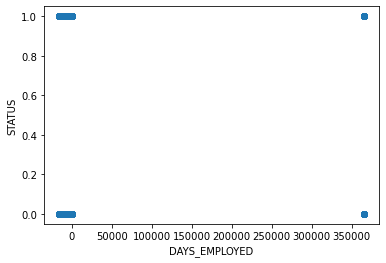

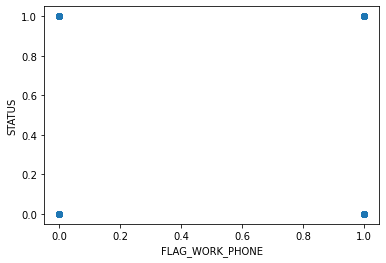

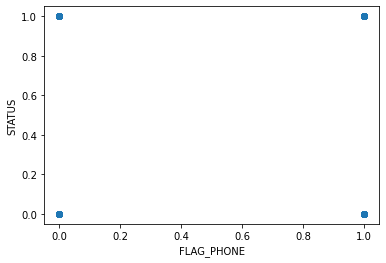

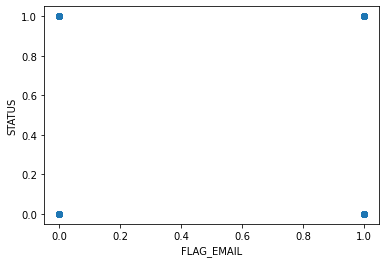

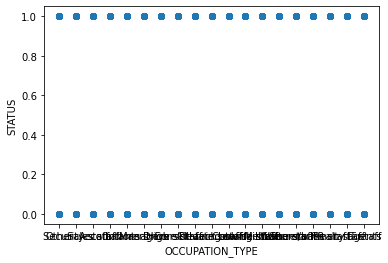

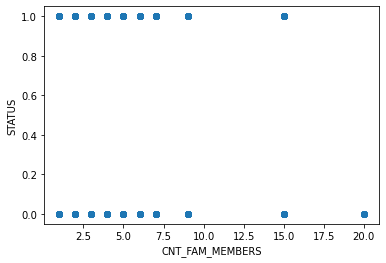

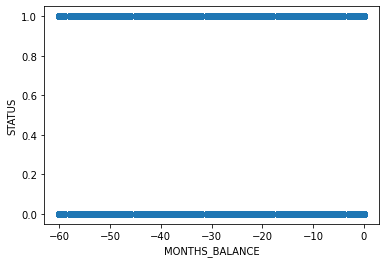

In [22]:
# create a scatter plot for column status with other columns
for i in df2.columns:
    if i != 'STATUS':
        plt.scatter(df2[i], df2['STATUS'])
        plt.xlabel(i)
        plt.ylabel("STATUS")
        plt.show()

In [23]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df2)
print(X_dummies.columns)
X_dummies

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_Hou

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,1,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,0,0,0,1,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,0,0,0,1,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,0,0,0,1,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-9,...,0,0,0,0,0,0,0,0,0,0
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-10,...,0,0,0,0,0,0,0,0,0,0
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-11,...,0,0,0,0,0,0,0,0,0,0
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-12,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_dummies['STATUS'].value_counts()

1    475486
0    302229
Name: STATUS, dtype: int64

In [25]:
X = X_dummies.drop('STATUS', axis=1)
y = X_dummies['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



## LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6119948018639226
Testing Data Score: 0.609435835189195


In [29]:
predictions = model.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)


array([[    15,  75914],
       [    23, 118477]])

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

0.609435835189195

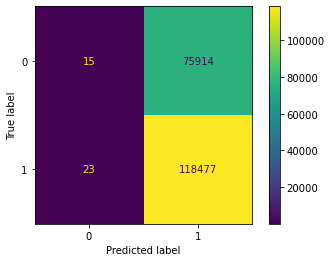

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)

In [33]:
TP = 118477
FP = 75914
TN = 15
FN = 23 
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.609435835189195


## ROC curve

In [34]:
# Get the probability for each class in the model
y_pred_proba = model.predict_proba(X_test)[:,1]

In [35]:
# Get the ROC curve data for the logistic regression model
# fpr increasing false positive rates
# tpr increasing true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

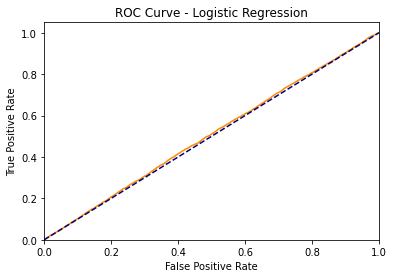

In [36]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [37]:
# since we didn't get very close score we decided to group the status column in different way
# 0: 1-29 days past due so we'll group C, X, and 0 together in order to get more accurate results

## Trial2

In [38]:
df3 = df.copy()

In [39]:
def new_status_trial2(sampleTrial2):
    if sampleTrial2=='C' or sampleTrial2=='X' or sampleTrial2=='0':
        return 1
    else:
        return 0
    

In [40]:
df3['STATUS'] = df3['STATUS'].apply(new_status_trial2)

In [41]:
df3['STATUS'].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

In [42]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

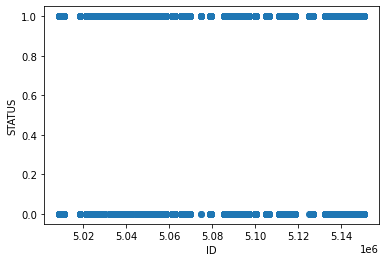

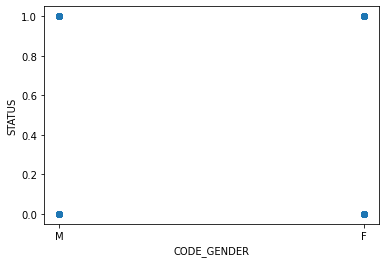

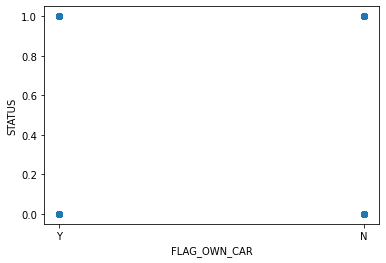

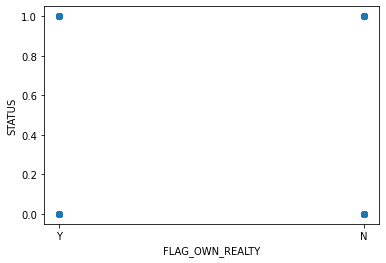

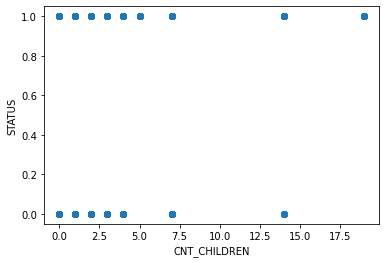

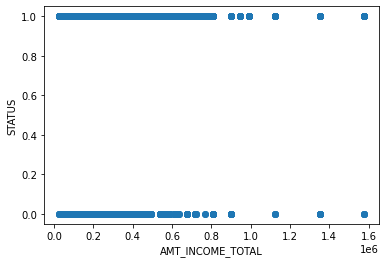

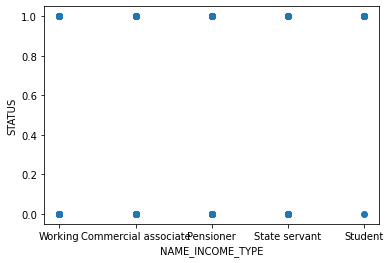

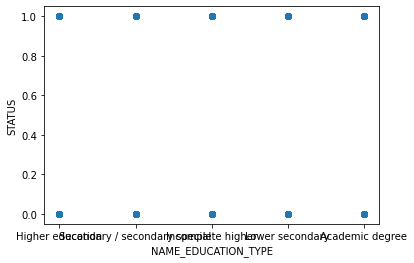

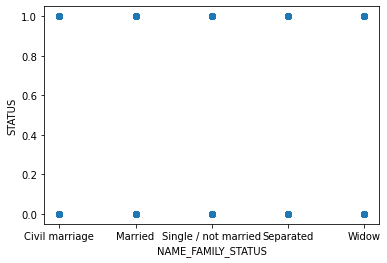

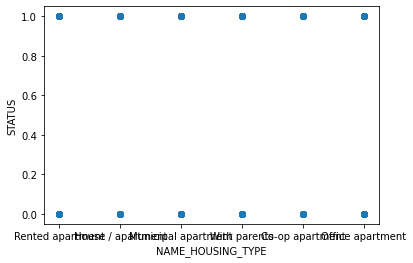

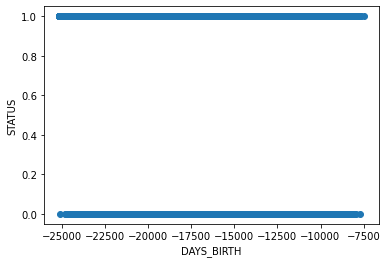

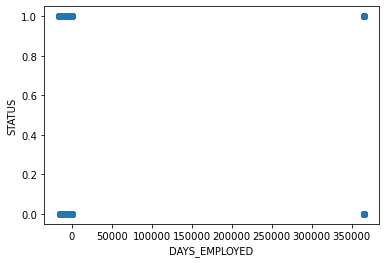

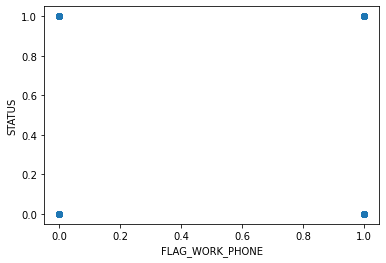

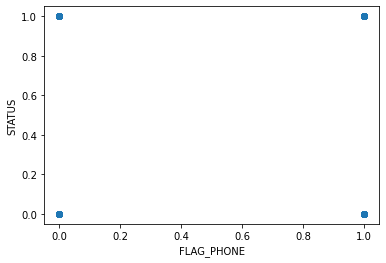

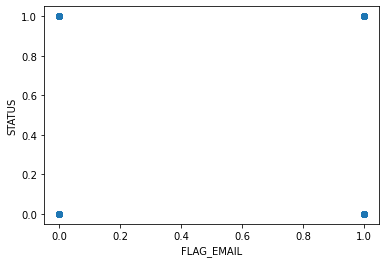

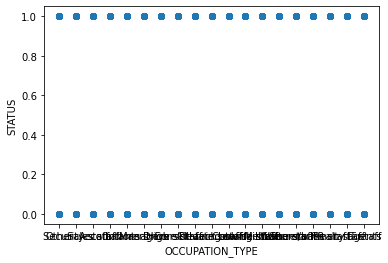

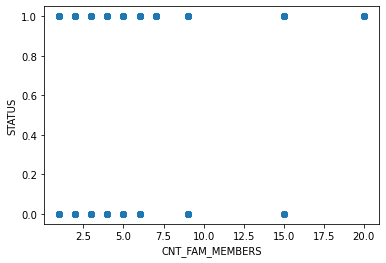

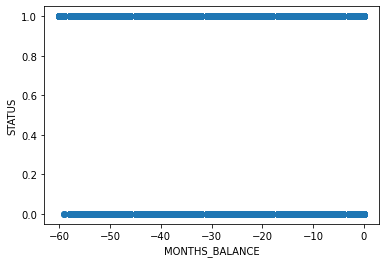

In [43]:
# create a scatter plot for column status with other columns
for i in df3.columns:
    if i != 'STATUS':
        plt.scatter(df3[i], df3['STATUS'])
        plt.xlabel(i)
        plt.ylabel("STATUS")
        plt.show()

In [44]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df3)
print(X_dummies.columns)
X_dummies

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_Hou

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,1,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,0,0,0,1,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,0,0,0,1,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,0,0,0,1,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-9,...,0,0,0,0,0,0,0,0,0,0
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-10,...,0,0,0,0,0,0,0,0,0,0
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-11,...,0,0,0,0,0,0,0,0,0,0
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-12,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_dummies['STATUS'].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

In [46]:
X = X_dummies.drop('STATUS', axis=1)
y = X_dummies['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## LogisticRegression Trial2

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [48]:
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9851376511694092
Testing Data Score: 0.9850536699772153


In [50]:
predictions = model.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)


array([[     0,   2906],
       [     0, 191523]])

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

0.9850536699772153

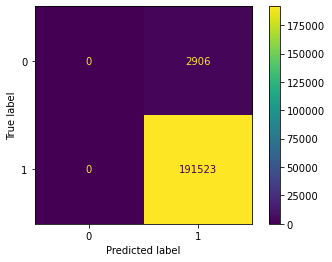

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)

In [54]:
TP = 191523
FP = 2906
TN = 0
FN = 0 
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.9850536699772153


## ROC Curve

In [55]:
# Get the probability for each class in the model
y_pred_proba = model.predict_proba(X_test)[:,1]

In [56]:
# Get the ROC curve data for the logistic regression model
# fpr increasing false positive rates
# tpr increasing true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

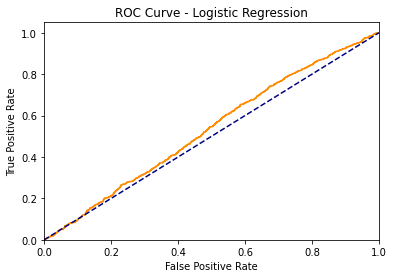

In [57]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [58]:
# we got more accurate model but we're gonna give it one ore try 
# since 1: 30-59 days past due so it's also past due not overdue we're going to group it with C, X and 0

## Trial3

In [59]:
df4 = df.copy()

In [60]:
def new_status_trial3(sampleTrial3):
    if sampleTrial3=='C' or sampleTrial3=='X' or sampleTrial3=='0'or sampleTrial3=='1':
        return 1
    else:
        return 0
    

In [61]:
df4['STATUS'] = df4['STATUS'].apply(new_status_trial3)

In [62]:
df4['STATUS'].value_counts()

1    774887
0      2828
Name: STATUS, dtype: int64

In [63]:
df3['STATUS'].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

In [64]:
df2['STATUS'].value_counts()

1    475486
0    302229
Name: STATUS, dtype: int64

In [65]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

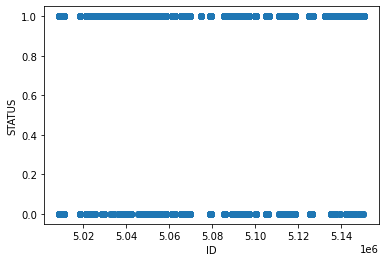

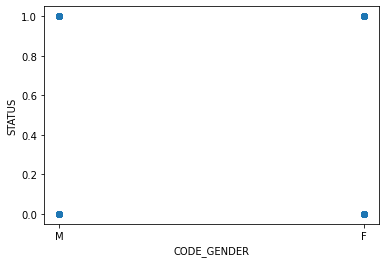

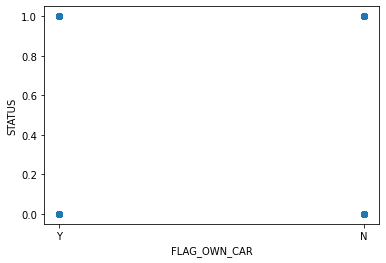

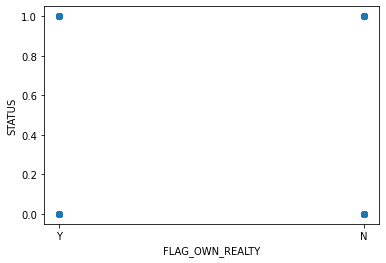

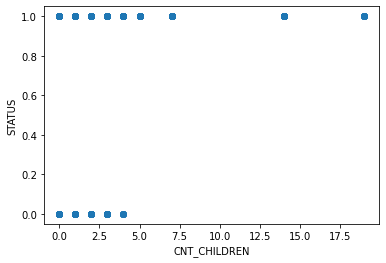

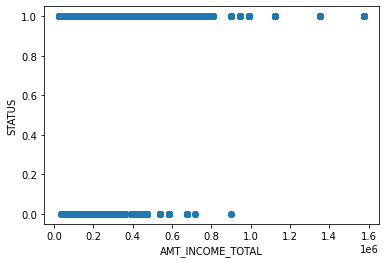

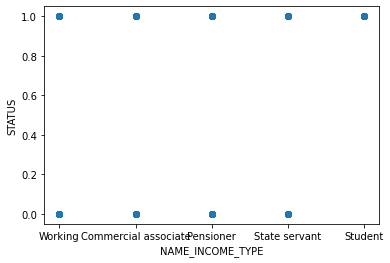

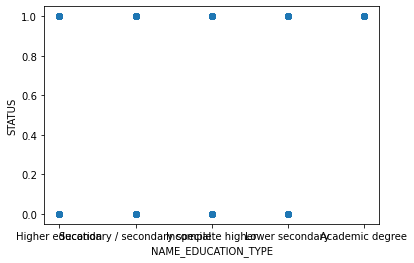

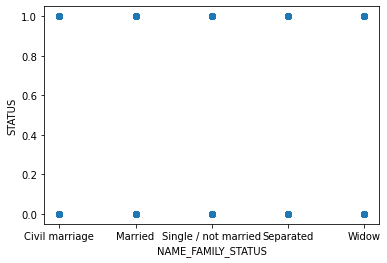

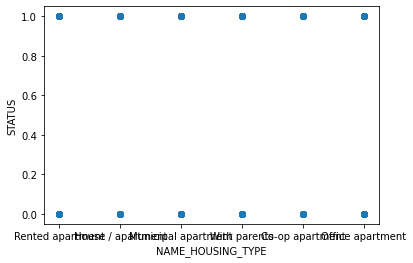

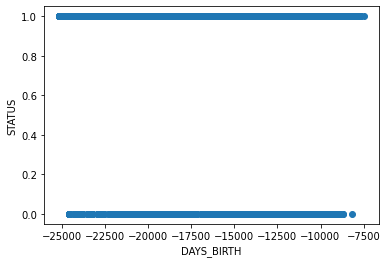

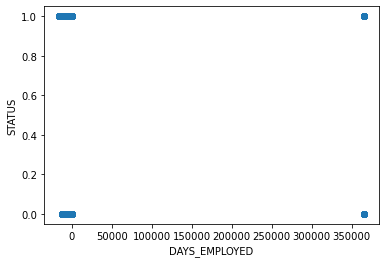

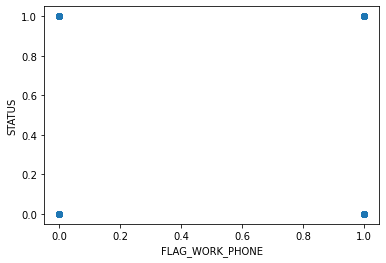

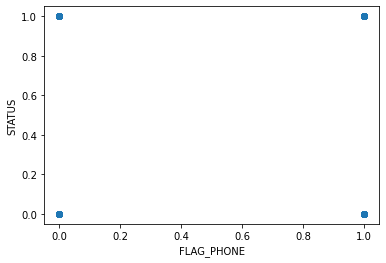

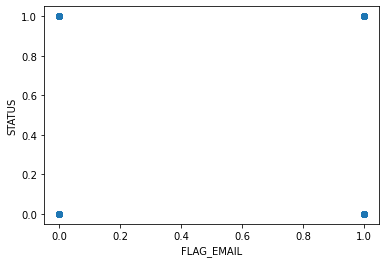

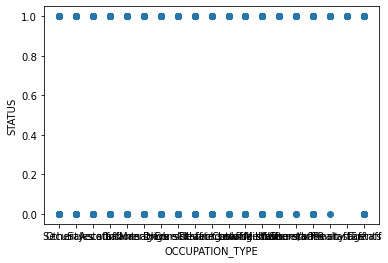

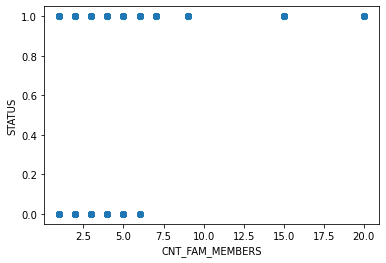

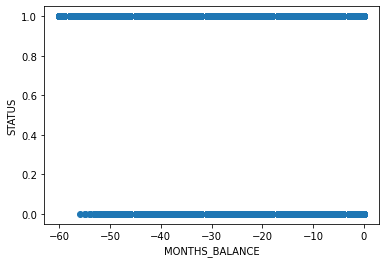

In [66]:
# create a scatter plot for column status with other columns
for i in df4.columns:
    if i != 'STATUS':
        plt.scatter(df4[i], df4['STATUS'])
        plt.xlabel(i)
        plt.ylabel("STATUS")
        plt.show()

In [67]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df4)
print(X_dummies.columns)
X_dummies

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_Hou

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,0,...,0,0,0,1,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-1,...,0,0,0,1,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-2,...,0,0,0,1,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-3,...,0,0,0,1,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,0,0,2.0,-4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-9,...,0,0,0,0,0,0,0,0,0,0
777711,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-10,...,0,0,0,0,0,0,0,0,0,0
777712,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-11,...,0,0,0,0,0,0,0,0,0,0
777713,5150337,0,112500.0,-9188,-1193,0,0,0,1.0,-12,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_dummies['STATUS'].value_counts()

1    774887
0      2828
Name: STATUS, dtype: int64

In [69]:
X = X_dummies.drop('STATUS', axis=1)
y = X_dummies['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



## LogisticRegression Trial3

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [71]:
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9963619905158019
Testing Data Score: 0.9963688544404384


In [73]:
predictions = model.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)


array([[     0,    706],
       [     0, 193723]])

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

0.9963688544404384

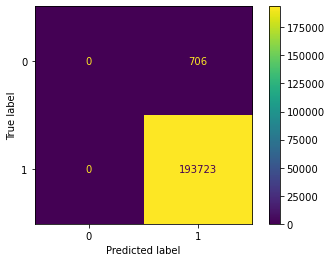

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)

In [77]:
TP = 193723
FP = 706
TN = 0
FN = 0
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.9963688544404384


## ROC Curve

In [80]:
# Get the probability for each class in the model
y_pred_proba = model.predict_proba(X_test)[:,1]

In [81]:
# Get the ROC curve data for the logistic regression model
# fpr increasing false positive rates
# tpr increasing true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

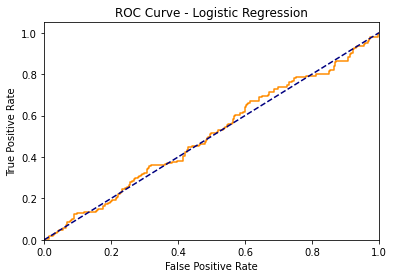

In [82]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

## Trying linearRegression and Ridge model

In [83]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
    

In [85]:
list1 = [LinearRegression(), Ridge() ]

Model LinearRegression()
Score: 0.009476555271365372



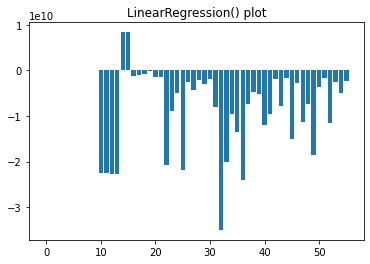

Model Ridge()
Score: 0.009469140962788392



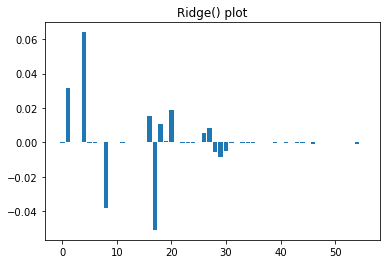

In [86]:
for z in list1:
        reg = z.fit(X_train_scaled, y_train)
        print(f'Model {z}')
        print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
        plt.bar(np.arange(len(reg.coef_)), reg.coef_)
        plt.title(f'{z} plot')
        plt.show()
    